# 1)

In [11]:
import pandas as pd

file_path = "dirty_cafe_sales.csv"
df = pd.read_csv(file_path)
df.head(), df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


(  Transaction ID    Item Quantity Price Per Unit Total Spent  Payment Method  \
 0    TXN_1961373  Coffee        2            2.0         4.0     Credit Card   
 1    TXN_4977031    Cake        4            3.0        12.0            Cash   
 2    TXN_4271903  Cookie        4            1.0       ERROR     Credit Card   
 3    TXN_7034554   Salad        2            5.0        10.0         UNKNOWN   
 4    TXN_3160411  Coffee        2            2.0         4.0  Digital Wallet   
 
    Location Transaction Date  
 0  Takeaway       2023-09-08  
 1  In-store       2023-05-16  
 2  In-store       2023-07-19  
 3   UNKNOWN       2023-04-27  
 4  In-store       2023-06-11  ,
 None,
        Transaction ID   Item Quantity Price Per Unit Total Spent  \
 count           10000   9667     9862           9821        9827   
 unique          10000     10        7              8          19   
 top       TXN_1961373  Juice        5            3.0         6.0   
 freq                1   1171     20

Датасет содержит 10000 строк и 8 столбцов. Все данные представлены в виде 'object'.<br>
Столбцы Item, Quantity, Price Per Unit, Total Spent, Payment Method, Location и Transaction Date содержат пропущенные значения.<br>
Особенно много пропущенных данных в Payment Method и Location (около 30%).<br>
Чаще всего посетители брали 5 единиц продуктов, среди них самый распространенный - сок. В среднем посетители тратили 6 денежных единиц и предпочитали оплачивать электронным кошельком.<br>
В Transaction Date чаще всего встречается значение UNKNOWN, их 159.<br>

# 2)

Основные связи в данных:<br>
Item, Quantity и Price_Per_Unit влияют на Total_Spent.<br>
Payment_Method может зависеть от Total_Spent. К примеру, дорогие покупки чаще оплачиваются картой.<br>
Location может зависеть от Item. К примеру, напитки чаще берут с собой, а десерты едят в кафе.<br>

Для данного датасета доступны:<br>
Регрессия - предсказание суммы покупки.<br>
Классификация - Определение метода оплаты по стоимости заказа.<br>
Анализ ассоциаций - поиск часто встречающихся комбинаций товаров.

# 3)

Возможные верхнеуровневые задачи:<br>
Оптимизация продаж:<br>
    Какие товары чаще покупают вместе? Можно предлагать комбо-наборы.<br>
    Какие товары приносят больше прибыли? Можно менять их расположение в меню.<br>

Маркетинговые стратегии:<br>
    Какие клиенты чаще платят картой, а какие наличными? Можно делать спецпредложения для разных групп.<br>
    Как меняются покупки в зависимости от дня недели?<br>

Прогнозирование спроса:<br>
    Сколько кофе или печенья понадобится завтра?<br>

Оптимизация работы кафе:<br>
    В какое время кассы загружены больше всего? Стоит ли менять график сотрудников?<br>

# 4)

In [12]:
df_clean = df.copy()

# Убираем пробелы в названиях столбцов
df_clean.columns = df_clean.columns.str.strip().str.replace(" ", "_")

# Удаляем строки с ERROR в Total_Spent
df_clean = df_clean[df_clean.Total_Spent != 'ERROR']

# Преобразуем числовые столбцы
cols_to_convert = ['Quantity', 'Price_Per_Unit', 'Total_Spent']
for col in cols_to_convert:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Удаляем строки, где отсутствуют ключевые значения
df_clean = df_clean.dropna(subset=['Item', 'Quantity', 'Price_Per_Unit', 'Total_Spent'])

# Заменяем UNKNOWN на NaN
df_clean.replace("UNKNOWN", pd.NA, inplace=True)
df_clean.info(), df_clean.head()

<class 'pandas.core.frame.DataFrame'>
Index: 8261 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    8261 non-null   object 
 1   Item              7978 non-null   object 
 2   Quantity          8261 non-null   float64
 3   Price_Per_Unit    8261 non-null   float64
 4   Total_Spent       8261 non-null   float64
 5   Payment_Method    5905 non-null   object 
 6   Location          5290 non-null   object 
 7   Transaction_Date  8009 non-null   object 
dtypes: float64(3), object(5)
memory usage: 580.9+ KB


(None,
   Transaction_ID      Item  Quantity  Price_Per_Unit  Total_Spent  \
 0    TXN_1961373    Coffee       2.0             2.0          4.0   
 1    TXN_4977031      Cake       4.0             3.0         12.0   
 3    TXN_7034554     Salad       2.0             5.0         10.0   
 4    TXN_3160411    Coffee       2.0             2.0          4.0   
 5    TXN_2602893  Smoothie       5.0             4.0         20.0   
 
    Payment_Method  Location Transaction_Date  
 0     Credit Card  Takeaway       2023-09-08  
 1            Cash  In-store       2023-05-16  
 3            <NA>      <NA>       2023-04-27  
 4  Digital Wallet  In-store       2023-06-11  
 5     Credit Card       NaN       2023-03-31  )

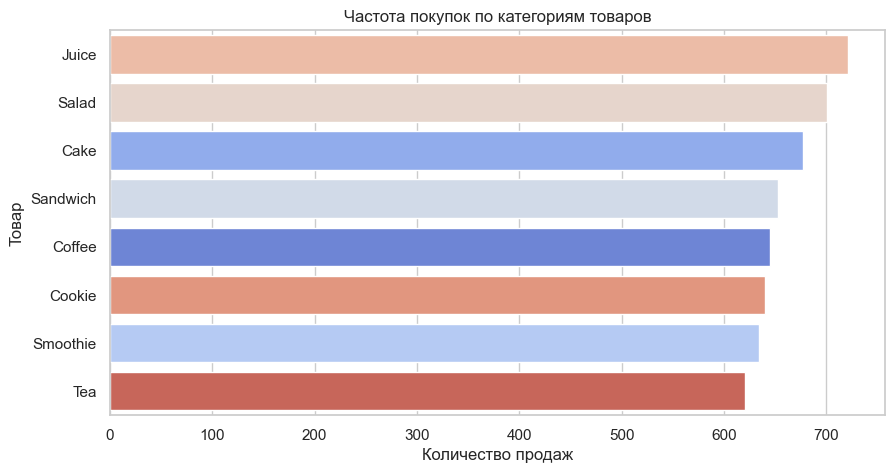

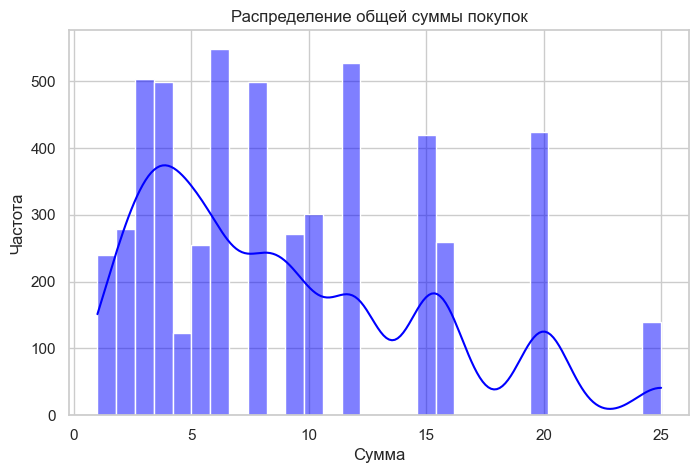

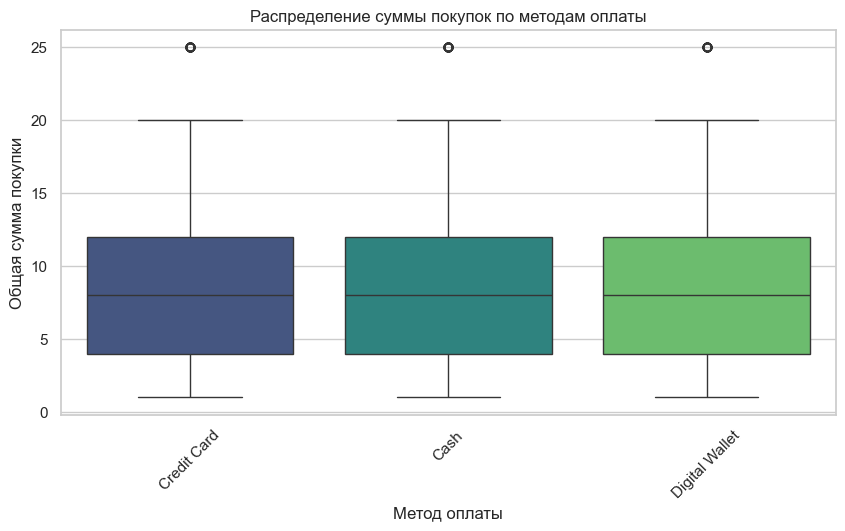

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Удаляем строки, где есть ERROR в любом из столбцов
df_clean = df_clean.replace("ERROR", pd.NA)
df_clean = df_clean.dropna(subset=['Item', 'Payment_Method', 'Total_Spent'])

# Частота покупок по категориям товаров
plt.figure(figsize=(10, 5))
sns.countplot(y=df_clean["Item"], order=df_clean["Item"].value_counts().index, palette="coolwarm", hue=df_clean["Item"], legend=False)
plt.title("Частота покупок по категориям товаров")
plt.xlabel("Количество продаж")
plt.ylabel("Товар")
plt.show()

# Распределение общей суммы покупок
plt.figure(figsize=(8, 5))
sns.histplot(df_clean["Total_Spent"], bins=30, kde=True, color="blue")
plt.title("Распределение общей суммы покупок")
plt.xlabel("Сумма")
plt.ylabel("Частота")
plt.show()

# Распределение суммы покупок по методам оплаты
plt.figure(figsize=(10, 5))
sns.boxplot(x="Payment_Method", y="Total_Spent", data=df_clean, palette="viridis", hue=df_clean["Payment_Method"], legend=False)
plt.title("Распределение суммы покупок по методам оплаты")
plt.xlabel("Метод оплаты")
plt.ylabel("Общая сумма покупки")
plt.xticks(rotation=45)
plt.show()

Итоги очистки данных:<br>
Были проблемы с пропущенными значениями, значениями ERROR и UNKNOWN.<br>
Удалены "ERROR" в Total_Spent.<br>
Преобразованы числовые столбцы (Quantity, Price_Per_Unit, Total_Spent) в float.<br>
Удалены строки с отсутствующими значениями в ключевых полях (Item, Quantity, Price_Per_Unit, Total_Spent).<br>
Заменены "UNKNOWN" на NaN, чтобы можно было корректно обработать пропущенные значения.<br>

# 5)

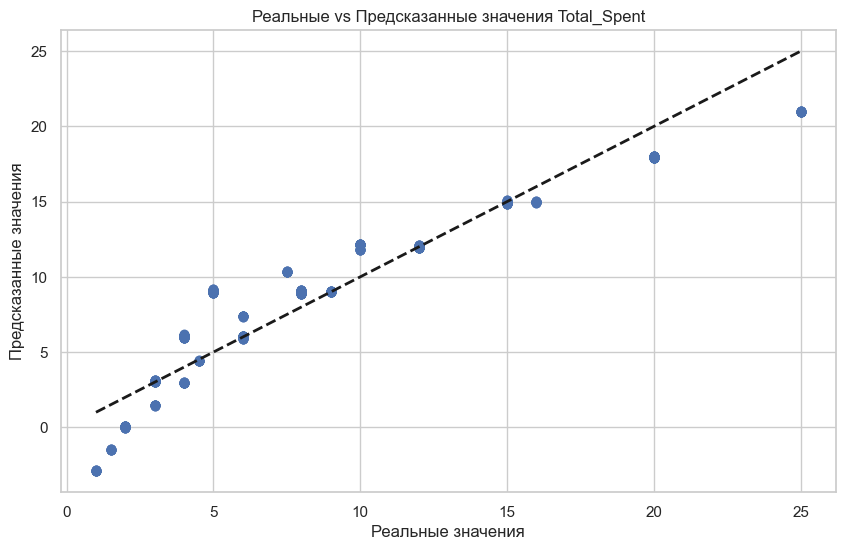

MAE: 1.2990321778590401
RMSE: 1.8253430217473756
R2: 0.9098287585082401


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df_model = df_clean.dropna(subset=['Item', 'Quantity', 'Payment_Method', 'Total_Spent'])

# One-Hot Encoding для категориальных переменных
encoder = OneHotEncoder(drop="first")
encoded_features = encoder.fit_transform(df_model[['Item', 'Payment_Method']]).toarray()  # Преобразуем в плотный массив
encoded_feature_names = encoder.get_feature_names_out(['Item', 'Payment_Method'])

# Создаем DataFrame с закодированными переменными
df_encoded = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=df_model.index)

# Объединяем с числовыми признаками
df_final = pd.concat([df_model[['Quantity']], df_encoded, df_model[['Total_Spent']]], axis=1)

# Разделение на обучающую и тестовую выборки
X = df_final.drop(columns=['Total_Spent'])
y = df_final['Total_Spent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказания и оценка качества модели
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Реальные vs Предсказанные значения Total_Spent')
plt.show()

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

Для предсказательной модели я выберу регрессию, так как буду предсказывать сумму покупки на основе типа товара, количества и метода оплаты.
Она хорошо подходит, если зависимость между переменными близка к линейной, а в нашем случае линейные зависимости между ценой за единицу и итоговой суммой очевидны.
Плюс ко всему, модель получается довольно простой, можно быстро получить и оценить результаты.

# 6)

Поскольку у нас задача регрессии, то я выбрал следующие метрики:

MAE - средняя абсолютная ошибка.<br>
Показывает, насколько в среднем предсказанные значения отличаются от реальных.<br>

RMSE - корень из средней квадратичной ошибки.<br>
Учитывает большие отклонения более строго, чем MAE, так как ошибки возводятся в квадрат.<br>
Хорошо подходит, если важно минимизировать влияние больших ошибок.<br>

R² - коэффициент детерминации.<br>
Показывает, какая доля изменчивости целевой переменной объясняется моделью.<br>
Значение близкое к 0.9 говорит о достаточно высокой точности модели.<br>

# 7)

Как использовать модель в бизнесе:<br>
Прогнозирование выручки - определить какие товары приносят больше денег и составить план закупок.<br>
Динамическое ценообразование - если модель предсказывает высокую вероятность большой покупки, можно предложить скидку на дополнительные товары.<br>
Оптимизация меню - если определенные комбинации товаров увеличивают средний чек, стоит предлагать их в виде комбо-наборов.<br>
Управление методами оплаты - анализ, какие методы оплаты связаны с более высокими суммами покупки.<br>

Бизнес-метрики для оценки модели:<br>
Средний чек ('Total Revenue' / 'Total Transactions') - Если предсказания помогают увеличивать покупки, средний чек растет.<br>
Конверсия предложений ('Accepted Offers' / 'Total Offers') - Если динамическое ценообразование работает, клиенты чаще соглашаются на спецпредложения.<br>
Точность прогноза выручки - Разница между предсказанной и фактической выручкой.<br>
Оборачиваемость запасов ('Cost of Goods Sold' / 'Average Inventory') - Помогает оптимизировать закупки, чтобы не было излишков.